In [479]:
import numpy, scipy

import plot_utils
import matplotlib.pyplot as plt

def spline(r, v, n=300):
    # Use spline to smooth the curve
    from scipy.interpolate import make_interp_spline
    rnew = numpy.linspace(r.min(), r.max(), n)
    spl = make_interp_spline(r, v, k=3)
    vnew = spl(rnew)
    return rnew, vnew, spl

[0.5   0.25  0.125]
-3.2923505191969787e-12 -1.999999999994531 -0.10657642217741113 0.9320222378369172 3.071597746939294e-11
[0.5   0.25  0.125]
9.745820529920885e-05 -2.090788988260768 0.945023340207667 0.21207737091413628 3.372309750863221e-05
[0.5   0.25  0.125]
0.000802742687098298 -2.1833070841901367 0.9453861995278496 0.2113698081832451 0.00027677140256431704
[0.5   0.25  0.125]
0.0027850814755093923 -2.2778003551094232 0.9460433684289637 0.21008251133702782 0.0009539498211423236
[0.5   0.25  0.125]
0.0067767432372353945 -2.374541055626327 0.947042506359375 0.20811065310499668 0.002297751121915093
[0.5   0.25  0.125]
0.013569275772481045 -2.4738279683809385 0.9484330025321931 0.20533605497414645 0.004535014418555381
[0.5   0.25  0.125]
0.02401040563248077 -2.5759864340616274 0.9502620274323514 0.20163033898319604 0.007869491010982436
[0.5   0.25  0.125]
0.03900115583410622 -2.681367711252095 0.952568648990488 0.19686095675704773 0.012459972892881683
[0.5   0.25  0.125]
0.05949204

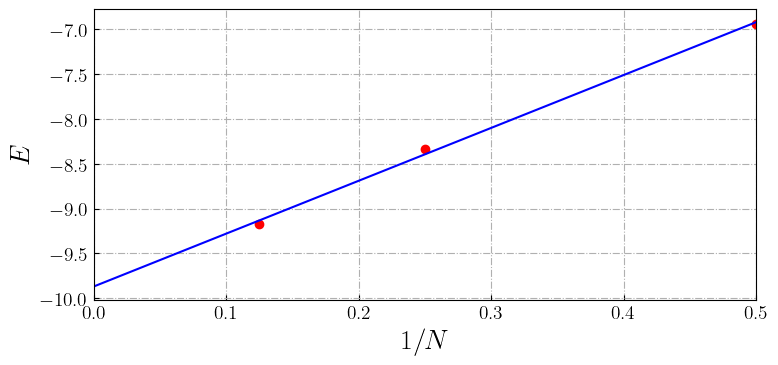

In [480]:
def extrapolate(nphs, datas):
    nphs = numpy.array(nphs)
    datas = numpy.array(datas)
    npts = datas.shape[1]
    
    data_fci = []
    for i in range(npts):
        alph = -datas[0, i, 0]
        ds = datas[:, i, 3]
        
        from scipy.stats import linregress
        nphx = 1.0 / (nphs)
        # nphx = numpy.exp(-nphs)
        print(nphx)
        slope, intercept, r_value, p_value, std_err = linregress(nphx, ds)

        print(slope, intercept, r_value, p_value, std_err)
        dd = [datas[0, i, 0]] + [datas[x, i, 3] for x in range(nphs.size)] + [intercept]
        data_fci.append(dd)
        
        if i == npts - 1:
            fig, ax = plt.subplots(1, figsize=(8, 4), sharex=True)
            ax.grid(True, linestyle='-.')
            ax.set_ylabel(r'$E$')
            ax.set_xlabel(r'$1 / N$')
            ax.plot(nphx, ds, linestyle='', marker='o', color='red')
            xx = numpy.linspace(0.0, nphx.max(), 100)
            ax.plot(xx, intercept + slope * xx, linestyle='-', color='blue')
            fig.tight_layout()
            ax.set_xlim(0.0, nphx.max())
            # ax.set_ylim(-0.1, 0.0)
            fig.savefig(f'/Users/yangjunjie/Downloads/scratch/xx-{i}.pdf')
        
    data_fci = numpy.array(data_fci)
    return data_fci

data1 = numpy.loadtxt(f'../../../cceph-main/examples/holstein-model-6-omega-1.0000-mo-fci-2.dat', delimiter=',')
data2 = numpy.loadtxt(f'../../../cceph-main/examples/holstein-model-6-omega-1.0000-mo-fci-4.dat', delimiter=',')
data3 = numpy.loadtxt(f'../../../cceph-main/examples/holstein-model-6-omega-1.0000-mo-fci-6.dat', delimiter=',')
datai = extrapolate([2, 4, 8], [data1, data2, data3])

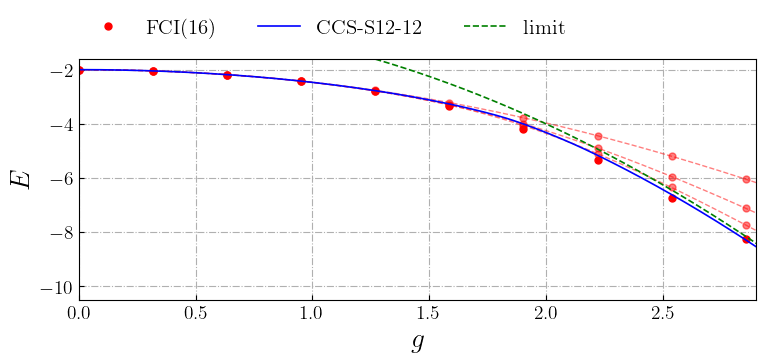

In [481]:
fig, ax = plt.subplots(1, figsize=(8, 4), sharex=True)

ax.grid(True, linestyle='-.')
ax.set_ylabel(r'$E$')

pp = lambda x, y, nn, kwargs: (lambda a, b: ax.plot(a, b, **kwargs))(*spline(x, y, n=nn)[0:2])
kwarg = {'linestyle': '--', 'marker': "o", 'color': 'red', 'linewidth': 1.0, "alpha": 0.5, "markevery": 30, "markersize": 5}
pp(data1[:, 1], datai[:, 1], 300, kwarg)
pp(data2[:, 1], datai[:, 2], 300, kwarg)
pp(data3[:, 1], datai[:, 3], 300, kwarg)
kwarg["linestyle"] = ''
kwarg["marker"] = "o"
kwarg["alpha"] = 1.0
kwarg["label"] = "FCI(16)"
pp(data3[:, 1], datai[:, 4], 300, kwarg)

# pp = lambda x, y, nn, kwargs: (lambda a, b: ax.plot(a, b, **kwargs))(x, y)
data1 = numpy.loadtxt(f'../../../cceph-main/examples/holstein-model-6-omega-1.0000-site-ccs.dat', delimiter=',')
# data1 = numpy.array(list(filter(lambda x: not (numpy.isnan(x[3]) or numpy.isnan(x[4])), data1)))

data2 = numpy.loadtxt(f'../../../cceph-main/examples/holstein-model-6-omega-1.0000-mo-ccs.dat', delimiter=',')
# data2 = numpy.array(list(filter(lambda x: not (numpy.isnan(x[3]) or numpy.isnan(x[4])), data2)))

data3 = numpy.loadtxt(f'../../../cceph-main/examples/holstein-model-6-omega-1.0000-scf-ccs.dat', delimiter=',')
# data3 = numpy.array(list(filter(lambda x: not (numpy.isnan(x[3]) or numpy.isnan(x[4])), data1)))

d3 = []
for ii in range(data3.shape[0]):
    dd3 = min([d[ii, 3] if not numpy.isnan(d[ii, 3]) else 1.0 for d in [data1, data2, data3]])
    if dd3 < 0.0:
        d3.append((data1[ii, 1], dd3))
    # if not numpy.isnan(data3[ii, 3]):
    #     d3.append((data1[ii, 1], data3[ii, 3]))
        
d3 = numpy.array(d3)
# pp(d3[:, 0], d3[:, 1], 300, {'label': 'CCS', 'linestyle': '-', 'color': 'blue', 'linewidth': 1.0})

d4 = []
for ii in range(data3.shape[0]):
    dd4 = [d[ii, 4] if not numpy.isnan(d[ii, 4]) else 1.0 for d in [data1, data2, data3]]
    dd4 = min(dd4) if ii < 8 or ii >= 24 else data2[ii, 4] if not numpy.isnan(data2[ii, 4]) else 1.0
    
    if not numpy.isnan(dd4) and dd4 < 0.0:
        d4.append((data1[ii, 1], dd4))
        
d4 = numpy.array(d4)
pp(d4[:, 0], d4[:, 1], 300, {'label': 'CCS-S12-12', 'linestyle': '-', 'color': 'blue', 'linewidth': 1.2})
pp(data1[:, 1], -data1[:, 1]**2, 300, {'label': 'limit', 'linestyle': '--', 'color': 'green', 'linewidth': 1.2})

ax.legend(
    loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
    edgecolor='silver', frameon=False, fontsize=15, ncol=3
    )
ax.set_xlabel(r'$g$')

ax.set_ylim(-10.5, -1.6)
ax.set_xlim(0.0, 2.9)
fig.tight_layout()
fig.savefig('/Users/yangjunjie/Downloads/gs-omega-1.0.pdf')


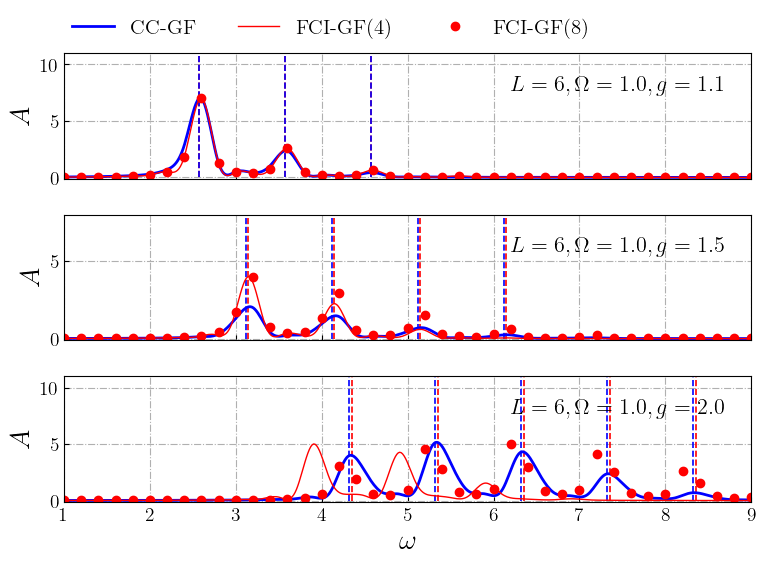

In [482]:
fig, axs = plt.subplots(3, figsize=(8, 6), sharex=True)


spl_fci = lambda x, ii: spline(data1[:, 1], datai[:, ii], n=300)[2](x)
spl_cc  = lambda x: spline(d4[:, 0], d4[:, 1], n=300)[2](x)

for ig, g in enumerate([1.1, 1.5, 2.0]):
    ax = axs[ig]
    ax.set_xlim(1.0, 9.0)

    ax.grid(True, linestyle='-.')
    ax.set_ylabel(r'$A$')
    ax.text(0.65, 0.7, f'$L=6, \Omega={1.0}, g={g}$', transform=ax.transAxes, fontsize=16)
    
    e0_fci = [0.0 - spl_fci(g, ii) for ii in range(1, 5)]
    e0_cc  = 0.0 - spl_cc(g)
    
    for ii, e0 in enumerate(e0_fci):  
        if ii == 2:
            ax.vlines(e0, 0.0, 20.0, linestyle='--', color='red', linewidth=1.2, alpha=1.0)
            ax.vlines(e0+1, 0.0, 20.0, linestyle='--', color='red', linewidth=1.2, alpha=1.0)
            ax.vlines(e0+2, 0.0, 20.0, linestyle='--', color='red', linewidth=1.2, alpha=1.0)
            
            if g >= 1.5:
                ax.vlines(e0+3, 0.0, 20.0, linestyle='--', color='red', linewidth=1.2, alpha=1.0)
                
            if g >= 2.0:
                ax.vlines(e0+4, 0.0, 20.0, linestyle='--', color='red', linewidth=1.2, alpha=1.0)
        
    ax.vlines(e0_cc, 0.0, 20.0, linestyle='--', color='blue', linewidth=1.2)
    ax.vlines(e0_cc+1, 0.0, 20.0, linestyle='--', color='blue', linewidth=1.2)
    ax.vlines(e0_cc+2, 0.0, 20.0, linestyle='--', color='blue', linewidth=1.2)
    
    if g >= 1.5:
        ax.vlines(e0_cc+3, 0.0, 20.0, linestyle='--', color='blue', linewidth=1.2)
        
    if g >= 2.0:
        ax.vlines(e0_cc+4, 0.0, 20.0, linestyle='--', color='blue', linewidth=1.2)
    
    dict_data = {}
    for label in ["CC-GF", "FCI-GF(4)", "FCI-GF(16)"]:
        dict_data[label] = numpy.loadtxt(f'../gf-{label}-g-{g}.out', delimiter=',')
    
    for label in ["CC-GF", "FCI-GF(4)", "FCI-GF(16)"]:
        data = dict_data[label]

        if g == 1.1:
            f = 7.0 / (data[:,1].max())
            ax.set_ylim(-0.1, 11.0)
            
        elif g == 1.5:
            if label == "CC-GF":
                data = dict_data["FCI-GF(4)"]
            
            elif label == "FCI-GF(4)":
                data = dict_data["CC-GF"]
                
            if label == "FCI-GF(4)":
                data[:, 0] += 0.15
                
            f = 2.0 / (data[:,1].max()) * (2.0 if "FCI" in label else 1.0)
            ax.set_ylim(-0.1, 8.0)
            
        else:
            if label == "CC-GF":
                data = dict_data["FCI-GF(4)"]
                data[:, 0] += 0.30
            
            elif label == "FCI-GF(4)":
                data = dict_data["CC-GF"]
                data[:, 0] += 0.30
        
            assert g == 2.0
            f = 5.0 / (data[:,1].max())
            ax.set_ylim(-0.1, 11.0)
        
        if label == "CC-GF":            
            x, y = spline(data[:,0], f * data[:,1] , n=600)[0:2]
            ax.plot(x, y, label=label, linestyle='-', markevery=1, color='blue', linewidth=2.0)
            
        elif label == "FCI-GF(4)":
            x, y = spline(data[:,0], f * data[:,1], n=600)[0:2]
            ax.plot(x, y, label=label, linestyle='-', markevery=1, color='red', linewidth=1.0)
            
        elif label == "FCI-GF(16)":
            x, y = spline(data[:,0], f * data[:,1], n=51)[0:2]
            ax.plot(x, y, label="FCI-GF(8)", linestyle='', marker="o", markevery=1, color='red', linewidth=1.0)
        
ax = axs[-1]
ax.set_xlabel(r'$\omega$')

ax = axs[0]
ax.legend(
    loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
    edgecolor='silver', frameon=False, fontsize=15, ncol=3
    )

fig.tight_layout()

fig.savefig('/Users/yangjunjie/Downloads/gfn-omega-1.0.pdf')